In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import seaborn as sns
import re

from collections import Counter
from tqdm import tqdm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import warnings
# 경고메세지 끄기
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist
path = '/usr/share/fonts/nanum/NanumMyeongjoBold.ttf' # fontlist에 있던 경로입니다
font_name = fm.FontProperties(fname=path).get_name()
font_name
plt.rcParams['font.family'] =font_name
plt.rcParams['axes.unicode_minus'] =False

# retrieval dadaset

In [3]:
import pandas as pd
import json
from pandas import json_normalize

In [10]:
with open('../input/data/wikipedia_documents.json') as f:
    js = json.loads(f.read()) ## json 라이브러리 이용
df = pd.DataFrame(js)
# df = pd.read_json('../input/data/wikipedia_documents.json') ## pd.read_json 이용

In [11]:
print('항목 길이: ',len(df))
print(list(df.index))
display(df.iloc[:,:3])

항목 길이:  8
['text', 'corpus_source', 'url', 'domain', 'title', 'author', 'html', 'document_id']


0  \
text           이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.   
corpus_source                                                                                                                                                                                                                                                                                                                                                                                                                                                                            위키피디아   
url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       TODO   
domain                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    None   
title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    나라 목록   
author                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    None   
html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      None   
document_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  0   

                                                                                                                                          

분석을 위한 transpose

In [12]:
df = df.transpose()
display(df.head(2))

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 ""포함 기준"" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 ""국가"" 문서에서 설명하고 있다.",위키피디아,TODO,None,나라 목록,None,None,0
1,"이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정에 따르면, 국가는 다음의 조건을 만족해야 한다.\n* (a) 영속적인 국민\n* (b) 일정한 영토\n* (c) 정부\n* (d) 타국과의 관계 참여 자격.\n특히, 마지막 조건은 국제 공동체의 참여 용인을 내포하고 있기 때문에, 다른 나라의 승인이 매우 중요한 역할을 할 수 있다. 이 목록에 포함된 모든 국가는 보통 이 기준을 만족하는 것으로 보이는 자주적이고 독립적인 국가이다. 하지만 몬테비데오 협약 기준을 만족하는지의 여부는 많은 국가가 논쟁이 되고 있는 실정이다. 또한, 몬테비데오 협약 기준만이 국가 지위의 충분한 자격이든 아니든, 국제법의 견해 차이는 존재할 수 있다. 이 물음에 대한 다른 이론에 대한 고리는 아래에서 볼 수 있다.\n\n위 기준에 논거하여 이 목록은 다음 206개 국가를 포함하고 있다.\n* 일반 국제 승인을 받은 195개 자주 국가.\n** 유엔 가입 국가 193개\n** 성좌의 명칭으로 유엔에서 국제 승인을 받은 국가: 바티칸 시국\n** 팔레스타인지역에 위치하며 유엔 영구 옵서버 국가: 팔레스타인\n* 유엔의 가입국이 아니며, 일반 국제 승인을 받지 않은 11개 자주 국가.\n** 유엔 회원국으로부터 승인을 받은 8개 국가: 남오세티야, 니우에, 북키프로스 튀르크 공화국, 사하라 아랍 민주 공화국, 압하지야, 중화민국, 코소보, 쿡 제도,\n** 유엔 비회원국으로부터 승인을 받은 2개 국가: 아르차흐 공화국, 트란스니스트리아\n** 어떤 나라에서도 승인 받지 않은 국가: 소말릴란드\n\n위 목록에 포함되지 않은 다음 국가는 몬테비데오 협약의 모든 조건을 만족하지 못하거나, 자주적이고 독립적임을 주장하지 않는 국가이다.\n* 남극 대륙 전체는 정부와 영속 인구가 없다. 7개 국가가 남극 대륙 일부를 차지하고 있으며, 이중 5개 국가가 서로의 영유권을 인정하고 있다. 남극 조약에 따라서 규제되는 이 권리는 어떤 나라에서도 승인을 받지 않았다. \n* EU 유럽 연합은 27개 가입 국가를 보유한 독특한 초국가 기구이다. 가입 국가는 입법권, 행정권, 사법권 기준을 유럽 연합 위원회로 이양하며, 유럽 연합은 엄밀히 말해 일반적인 주권 국가 간주와 관계 없이 주권 국가로의 특징을 가지고 있다. 유럽 연합은 주권 국가를 주장하지 않으며, 다른 나라와의 관계에서 제한된 지위를 가지고 있다.\n* 미국과 오스트레일리아, 기타 국가에서 주 (State)라고 칭하는 행정 구역은 주 (행정 구역)을 참고하라. 이러한 하부 국가 개념의 행정 구역은 일부를 제외하고는 다른 나라와 관계를 형성하지 않는다. 예를 들어서 독일 제국의 주는 해외 영사관을 가졌으며, 소비에트 연방의 한 부분이었던 우크라이나 소비에트 사회주의 공화국 (현재의 우크라이나)과 벨로루시 소비에트 사회주의 공화국 (현재의 벨라루스)는 유엔 가입국이었다. 무엇보다 중요한 것은, 이러한 주들은 자주적이고 독립적임을 주장하지 않는다는 것이다.\n* 몰타 기사단 몰타 기사단은 ""총회에 유효 참관국 자격으로 참여할 수 있으며, 본부에서 영속적인 지위를 유지하는 기타 국가"" 분류에 속하는 유엔 참관 국가이다. 이 단체는 104개 국가와 쌍방 외교 관계를 맺고 있으나, 로마 내의 치외 법권 영역 이외에는 일정한 영토가 없다. 단체의 웹사이트에서는 ""항상 국가에게 국제법의 독립 주체로 인정 받는다.""고 선언하고 있다. 기사단의 헌법 에서는 다음과 같이 설명하고 있다. ""기사단은 국제법의 주체이며, 주권 기능을 행사한다."" 기사단은 자주 주권을 주장하고 있지만, 이름에서 볼 수 있듯이 주권 국가라고 주장하지는 않는다. 다른 대사관처럼 이탈리아는 이론상 기사단과 외교 관계를 파기할 수 있으며, 이탈리아 국민이 아닌 단원을 이탈리아 영토에서 강제로 추방할 수 있다. 기사단의 단원은 모두 다른 나라의 국민이기 때문에, 사실상 이들은 모두 자신의 국가에서 살고 있으며, 로마에서 기사단의 치외 법권 영역에 거주하는 단원은 오직 공식 직무에만 연관하여 활동한다. 따라서, 기사단은 영속적인 국민의 특성이 부족하다고 볼 수 있다.\n* 마이크로네이션으로 여겨지는 국가는 자주적이고 독립적이라고 주장하고, 다른 나라와 외교 관계를 맺고자 시도하여도 포함하지 않았다. 마이크로네이션이 정말로 점유한 영토를 지배하는지, 마이크로네이션의 '인구' 감소 빈도가 낮은 지의 여부는 논쟁이 되고 있다.\n* ISIS 등은 다른 나라들 못지 않은 영역을 두고 있으며 스스로를 ""나라""라고 자처하지만, 국제법상 주권이 결여되어 있으며 국제법에 위배되는 테러리즘을 일삼아 '나라'로 간주되지도 않는다. 다만 준국가로 분류한다.",위키피디아,TODO,None,나라 목록,None,None,1


In [13]:
print('corpus_source: ',list(df.corpus_source.unique()))
print('domain: ',list(df.domain.unique()))
# print('title: ',list(df.title.unique()))
print('title_len: ',len(list(df.title.unique())))
print('len_corpus: ',len(df))
print(len(df) - len(list(df.title.unique())))
print('author: ',list(df.author.unique()))
print('html: ',list(df.html.unique()))

corpus_source:  ['위키피디아']
domain:  [None]
title_len:  31755
len_corpus:  60613
28858
author:  [None]
html:  [None]


text 길이

Text(0.5, 1.0, 'train context 문장 길이')

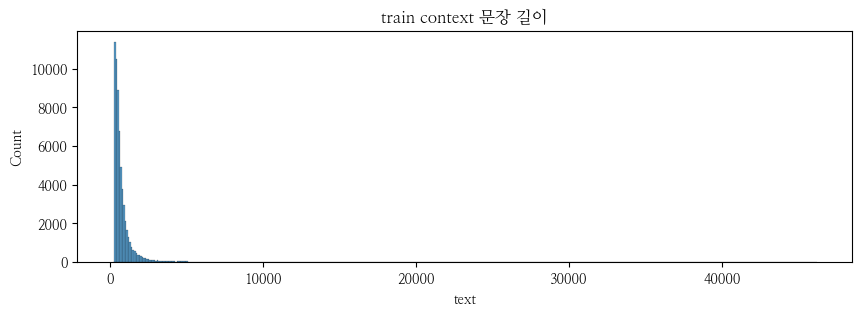

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
sns.histplot(data=df['text'].apply(lambda x: len(x)), ax=ax, bins=30,binwidth = 100)
ax.set_title('train context 문장 길이')

In [29]:
df_len = df['text'].apply(lambda x: len(x))
print(len(df_len[df_len>5000]))
print(len(df_len[df_len>2500]))
print(min(df_len))

163
1135
184


결측치 없음

In [18]:
print('결측치-------------')
display(df.isnull().sum())

결측치-------------


text                 0
corpus_source        0
url              56059
domain           60613
title                0
author           60613
html             60613
document_id          0
dtype: int64

### 중복데이터 개수

In [39]:
drop_du_df = df.copy()
len_before = len(df)
drop_du_df=drop_du_df[['text']].drop_duplicates().reset_index(drop=True)
len_after = len(drop_du_df)
print(f'text 기준 중복 제거된 개수: {len_before-len_after}개')

text 기준 중복 제거된 개수: 3876개


In [40]:
drop_du_df = df.copy()
len_before = len(df)
drop_du_df=drop_du_df[['title']].drop_duplicates().reset_index(drop=True)
len_after = len(drop_du_df)
print(f'title 기준 중복 제거된 개수: {len_before-len_after}개')

title 기준 중복 제거된 개수: 28858개


In [41]:
drop_du_df = df.copy()
len_before = len(df)
drop_du_df=drop_du_df[['text','title']].drop_duplicates().reset_index(drop=True)
len_after = len(drop_du_df)
print(f'text, title 기준 중복 제거된 개수: {len_before-len_after}개')

text, title 기준 중복 제거된 개수: 3805개


✅ text랑 title이 완전히 같은 것들만 없앨 듯 -> 베이스라인 코드에 있다면 따로 추가 안해도 될 듯!

⬆️ 나중에 타이틀을 쓴다 하면 title을 어떻게 쓸지? / answer랑 얼마나 닮아 있는지 확인해 보자

### 중복데이터 확인

text 같은 데이터 확인

In [58]:
drop_du_df = df.copy()
# drop_du_df['dup'] = df.duplicated(['text'], keep=False)
# len(drop_du_df[drop_du_df['dup']==True])/2
# display(drop_du_df.sort_values(by=['text']).head(10))
duplicateDFRow = drop_du_df[drop_du_df.duplicated('text',keep=False)]
display(duplicateDFRow.sort_values(by=['text']).head(6))

,text,corpus_source,url,domain,title,author,html,document_id
3859,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파일을 보실려면, 미디어위키:Robots.txt 와 '를 참조하시길 바랍니다.\n로봇 배제 표준(robots exclusion standard), 로봇 배제 프로토콜(robots exclusion protocol)은 웹 사이트에 로봇이 접근하는 것을 방지하기 위한 규약으로, 일반적으로 접근 제한에 대한 설명을 robots.txt에 기술한다.\n\n이 규약은 1994년 6월에 처음 만들어졌고, 아직 이 규약에 대한 RFC는 없다.\n\n이 규약은 권고안이며, 로봇이 robots.txt 파일을 읽고 접근을 중지하는 것을 목적으로 한다. 따라서, 접근 방지 설정을 하였다고 해도, 다른 사람들이 그 파일에 접근할 수 있다. robots.txt 파일은 항상 사이트의 루트 디렉토리에 위치해야 한다.",위키피디아,TODO,None,로봇 배제 표준,None,None,3859
8413,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파일을 보실려면, 미디어위키:Robots.txt 와 '를 참조하시길 바랍니다.\n로봇 배제 표준(robots exclusion standard), 로봇 배제 프로토콜(robots exclusion protocol)은 웹 사이트에 로봇이 접근하는 것을 방지하기 위한 규약으로, 일반적으로 접근 제한에 대한 설명을 robots.txt에 기술한다.\n\n이 규약은 1994년 6월에 처음 만들어졌고, 아직 이 규약에 대한 RFC는 없다.\n\n이 규약은 권고안이며, 로봇이 robots.txt 파일을 읽고 접근을 중지하는 것을 목적으로 한다. 따라서, 접근 방지 설정을 하였다고 해도, 다른 사람들이 그 파일에 접근할 수 있다. robots.txt 파일은 항상 사이트의 루트 디렉토리에 위치해야 한다.",위키피디아,None,None,로봇 배제 표준,None,None,8413
6873,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안관리 원칙을 기반으로 업종별 보안 전문성과 지능형 보안기술을 활용하여 비즈니스 환경에 맞는 보안 전략과 서비스를 제공한다. AI 기반의 위협 탐지를 통해 최신 랜섬웨어 악성코드 공격에 선제 대응이 가능한 보안서비스를 제공하고 있으며 보안 컨설팅, 클라우드 보안서비스, 보안관제서비스 및 위협관리보안서비스를 제공하고 있다. \n\n* 보안컨설팅 - IT, 산업제어, Cloud 환경의 안전한 운영 및 관리, 효율적인 보안관제, 기업보안의 현상황 및 개선방향 제시 등 경영자/보안실무자를 위해 방법론을 기반으로 문제점을 평가하고 개선안을 도출하도록 설계되었다. \n\n* 클라우드 보안서비스 - 클라우드에서 경험하는 On-premise 수준의 보안, 다양한 클라우드 환경을 아우르는 End-to-End 보안대책 적용을 통해 클라우드의 안전한 사용과 편의성을 극대화하는 최적의 보안서비스를 제공한다. \n\n* 보안관제서비스 - 보안시스템의 로그를 실시간으로 수집 및 상관분석하여 지능화, 고도화되고 있는 보안 위협을 탐지하고, 발생 원인 분석을 통한 조치 및 재발방지 가이드를 통해 보안사고에 대응할 수 있는 서비스를 제공한다. \n\n* 보안솔루션 - 머신러닝 기반 보안관제 솔루션 및 산업 제어 시스템의 보안 위협과 침입을 분석하고 탐지하는 위협관리 솔루션을 제공하여 고도화된 보안 위협을 사전에 예방하고 대응할 수 있도록 지원한다.",위키피디아,None,None,삼성SDS,None,None,6873
2319,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안관리 원칙을 기반으로 업종별 보안 전문성과 지능형 보안기술을 활용하여 비즈니스 환경에 맞는 보안 전략과 서비스를 제공한다. AI 기반의 위협 탐지를 통해 최신 랜섬웨어 악성코드 공격에 선제 대응이 가능한 보안서비스를 제공하고 있으며 보안 컨설팅, 클라우드 보안서비스, 보안관제서비스 및 위협관리보안서비스를 제공하고 있다. \n\n* 보안컨설팅 - IT, 산업제어, Cloud 환경의 안전한 운영 및 관리, 효율적인 보안관제, 기업보안의 현상황 및 개선방향 제시 등 경영자/보안실무자를 위해 방법론을 기반으로 문제점을 평가하고 개선안을 도출하도록 설계되었다. \n\n* 클라우드 보안서비스 - 클라우드에서 경험하는 On-premise 수준의 보안, 다양한 클라우드 환경을 아우르는 End-to-End 보안대책 적용을 통해 클라우드의 안전한 사용과 편의성을 극대화하는 최적의 보안서비스를 제공한다. \n\n* 보안관제서비스 - 보안시스템의 로그를 실시간으로 수집 및 상관분석하여 지능화, 고도화되고 있는 보안 위협을 탐지하고, 발생 원인 분석을 통한 조치 및 재발방지 가이드를 통해 보안사고에 대응할 수 있는 서비스를 제공한다. \n\n* 보안솔루션 - 머신러닝 기반 보안관제 솔루션 및 산업 제어 시스템의 보안 위협과 침입을 분석하고 탐지하는 위협관리 솔루션을 제공하여 고도화된 보안 위협을 사전에 예방하고 대응할 수 있도록 지원한다.",위키피디아,TODO,None,삼성SDS,None,None,2319
3744,"""아미타불""이라는 낱말은 무량광(無量光: 헤아릴 수 없는 광명을 가진 것)의 뜻인 산스크리트어 아미타바(Amitabha)와 무량수(無量壽: 헤아릴 수 없는 수명을 가진 것)의 뜻인 산스크리트어 아미타유스(Amitayus)의 두 원어의 음사(音寫)이다. 무량광(無量光)은 완전한 지혜(반야 보리)를 상징하고 무량수(無量壽)는 자비를 상징한다. 따라서 아미타불은 이 두 가지 덕성을 갖춘 부처라는 뜻이 되며, 이를 바탕으로 항상 모든 사람을 구제하는 구제불로서 활동한다는 것을 뜻한다\n\n《무량수경》 《아미타경》 등에서 아미타불은 10겁 전에 성불하였다고 하나, 이것은 중생을 제도하기 위한 방편 수단이고, 실제로는 이보다 훨씬 오랜 옛날에 이미 완전한 깨달음을 성취한 부처라는 의미에서 구원불(久遠佛) 또는 구원미타(久遠彌陀)라고도 한다.",위키피디아,TODO,None,아미타불,None,None,3744
8298,"""아미타불""이라는 낱말은 무량광(無量光: 헤아릴 수 없는 광명을 가진 것)의 뜻인 산스크리트어 아미타바(Amitabha)와 무량수(無量壽: 헤아릴 수 없는 수명을 가진 것)의 뜻인 산스크리트어 아미타유스(Amitayus)의 두 원어의 음사(音寫)이다. 무량광(無量光)은 완전한 지혜(반야 보리)를 상징하고 무량수(無量壽)는 자비를 상징한다. 따라서 아미타불은 이 두 가지 덕성을 갖춘 부처라는 뜻이 되며, 이를 바탕으로 항상 모든 사람을 구제하는 구제불로서 활동한다는 것을 뜻한다\n\n《무량수경》 《아미타경》 등에서 아미타불은 10겁 전에 성불하였다고 하나, 이것은 중생을 제도하기 위한 방편 수단이고, 실제로는 이보다 훨씬 오랜 옛날에 이미 완전한 깨달음을 성취한 부처라는 의미에서 구원불(久遠佛) 또는 구원미타(久遠彌陀)라고도 한다.",위키피디아,None,None,아미타불,None,None,8298


title 같은 데이터 확인

In [60]:
drop_du_df = df.copy()
# drop_du_df['dup'] = df.duplicated(['text'], keep=False)
# len(drop_du_df[drop_du_df['dup']==True])/2
# display(drop_du_df.sort_values(by=['text']).head(10))
duplicateDFRow = drop_du_df[drop_du_df.duplicated('title',keep=False)]
print(len(duplicateDFRow))
display(duplicateDFRow.sort_values(by=['title']).head(6))

40595


,text,corpus_source,url,domain,title,author,html,document_id
39917,"ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로 다르고, 시간이 지나면서 새로운 분류체계가 등장하고 있어 같은 용어라도 다른 의미로 쓰이는 경우가 있다. \nǃ쿵어(ǃKung)라는 이름은 서로 연관되어있는 방언 각각 이름에 주로 사용하며(예:북부 ǃ쿵어, 중부 ǃ쿵어), 때로는 더 넓은 의미로 방언연속체를 구성하는 언어들 중 북부/북서부 지역의 방언들을 일컫는 말이다. 이때 대응되는 개념은 주호안어(Ju|ʼhoan)이며, 전체 중 남부/남동부의 방언을 지칭한다.\n주어(Ju)라는 이름은 다양한 ǃ쿵어의 방언들을 하나의 “작은 어족”(language complex)으로 묶어서 부를 경우 주로 사용된다(예: 카어족은 주어(Ju)와 ǂʼ암코이어(ǂʼAmkoe)로 구성된다). \n유전자 기반의 분석을 진행하는 분자인류학자들은 북부 ǃ쿵어를 사용하는 사람들을 세켈레(Sekele) 또는 바시켈라 ǃ쿵(Vasikela ǃKung)으로 표기하였고, 남부 ǃ쿵어, 즉 주호안어(Ju|ʼhoan)을 사용하는 사람들을 춤쿠에 산(Tsumkwe San) 혹은 ǃ쿵(ǃKung)으로 분류하였다. \n\nǃ쿵(ǃKung)이라는 단어 역시 다양한 형태로 표현된다. ǃ쿵(ǃKung)이 처음으로 사용된 것은 1937년이었다. \nǃ쿵(ǃKung)을 나타내기 위하여 ǃXun ,\nǃXuun , ǃXʼu(u)n, ǃKu(u)n, ǃHu, ǃKhung, ǃKu, Kung, Qxü, ǃung, ǃXo, ǃXu ,\nXû, ǃXû, Xun, ǃXung ,\nǃXũ ,\nǃXũũ, ʗhũ: \n등 다양한 표기가 사용되었다. 주(Ju) 역시 Dzu , Juu , Zhu 등 다양한 형태로 표기되었다.\n\n최근 문헌의 경우 ǃ쿵어를 표기하기 위해 ǃXun 또는 ǃXuun을 사용하는 경우가 많다.",위키피디아,None,None,!쿵어,None,None,39917
39918,"다양한 ǃ쿵어들을 묶은 주어(Ju)는 흡착음을 사용하는 언어 중 코이코이어(Khoekhoe, ), 산다웨어(Sandawe, )에 이어 세 번째로 많은 사용자 수를 지닌다. 총 15,000명의 사용자가 있을 것으로 추정되며, 각각 나미비아에 9,000명, 보츠와나에 2,000명, 앙골라에 1,000명, 남아공에 3,700명의 사용자가 있을 것으로 추정된다. 앙골라의 ǃ쿵어 사용자 수는 1975년의 8,000명에서 앙골라 내전을 거친 현재 크게 줄어든 상태이다. 북부 ǃ쿵어를 사용하는 사람들이 앙골라 내전을 피하기 위해 나미비아로 탈출하거나, 남아공의 남아프리카 연방군에 소속되어 남아프리카 국경 전쟁에 투입되었다. 지속되는 남아프리카 국경 전쟁이 끝난 후 이들은 남아공으로 후송되어 슈미츠드리프트, 이어 플랫폰테인에 정착하게 되었다.",위키피디아,None,None,!쿵어,None,None,39918
58026,"기존에는 다른 카이퍼대 천체와 동일하게 반사율을 0.04로 추정하여 지름을 1,500 km 가량으로 예상했지만, 허셜 우주망원경과 스피처 우주망원경의 관측 결과 반사율을 0.112|+.012|-.011로 측정하여, 지름이 768 ± 38 km로 수정되었다 2002 AW|197의 크기는 큰 편으로, 정역학적 평형을 이루었을 것으로 추정되며, 따라서 왜행성 후보 천체로도 거론된다 태양과의 거리와 반사율로만 계산했을 때 표면 온도는 −233 °C ~ −234 °C 사이이다.\n\n광도곡선 분석을 통해 얻어진 자전 주기는 약 8.8시간으로, 2002 AW|197은 1번 공전할 때마다 약 320,780번 자전한다. 하지만 현재 광도곡선 관측 결과는 오차율이 30% 정도로, 논란의 여지가 있다.",위키피디아,None,None,(55565) 2002 AW197,None,None,58026
58025,"2002 AW|197은 2002년 1월 10일 캘리포니아 팔로마 천문대에서 마이클 E. 브라운을 주도로 한 팀이 발견하였다 발견 사실은 같은 해 7월 20일 공식적으로 발표되었으며, 이후 소행성체 번호 55565번을 부여받았다. 특별한 이름이 부여되지 않았기 때문에, 임시 명칭을 아직 정식 명칭의 일부로서 사용하고 있다.\n\n2002 AW|197의 발견 공표 이후 1997년 12월 29일 할레아칼라 천문대에서 2002 AW|197이 찍혔던 사진이 발견되었으며, 이를 통해 5년의 간격을 두고 천체를 관측한 셈이 되어 궤도를 정밀하게 계산할 수 있었다. 이후로도 허셜 우주망원경, 스피처 우주망원경, 다른 지상 망원경 등을 통한 지속적인 관측이 이루어졌으며, 2002 AW|197의 관측 기록은 총 209개 있다",위키피디아,None,None,(55565) 2002 AW197,None,None,58025
60091,"〈(Won't You Come Home) Bill Bailey〉는 1902년에 출판된 곡으로 원제는 〈Bill Bailey, Won't You Please.... Come Home?〉이며, 간단하게 〈Bill Bailey〉라고도 불린다.\n\n작사와 작곡은 미국의 작곡가 겸 피아니스트인 휴이 캐넌이 썼고, 하울리, 하빌랜드와 드레서에서 출판하였다. 여전히 딕시랜드와 전통 재즈가 섞인 노래의 기준이라는 평을 받고 있다. 32마디의 화음의 코러스는 ""Over the Waves"", ""Washington and Lee Swing"", Bourbon Street Parade"", ""My Little Girl"", ""Tiger Rag"", ""The Beer Barrel Polka""와 같은 곡에 사용되었다.",위키피디아,None,None,(Won't You Come Home) Bill Bailey,None,None,60091
60092,"캐넌은 1902년 미시간주 잭슨에 있는 콘래드 데이드리히의 살롱에서 바 피아니스트로 활동하고 있을 때 이 곡을 작곡하였다. 윌러드 빌 베일리는 단골손님이자 친구였고, 어느 날 밤 캐넌에게 사라(혼전 성 시에그리스트)와의 결혼 소식을 전했다. 캐넌은 ""베일리는 그 노래를 아주 좋다고 생각했고, 사라에게 보여주기 위해 악보를 빨리 베껴슨 본을 집으로 가지고 갔다. 사라는 썩 내키지는 않아 하였지만, 별다른 지적은 없었다.""고 언급하였다. 캐넌은 이 노래의 모든 권리를 뉴욕의 한 출판사에 팔았고, 35세의 나이에 간경변으로 사망하였다. 이후 윌러드와 사라는 이혼하였다. 윌러드는 1954년 사망하였으며, 사라는 1976년 약 102세의 나이로 사망했다.",위키피디아,None,None,(Won't You Come Home) Bill Bailey,None,None,60092


### title은 몇 건이 겹칠까?

In [76]:
counter = Counter(df.title)
counter = dict(sorted(counter.items(), key=lambda x: x[1],reverse=True))

In [77]:
counter

{'장면': 146,
 '윤치호': 144,
 '여운형': 96,
 '데카메론의 줄거리': 68,
 '루트비히 판 베토벤': 66,
 '제1차 세계 대전': 66,
 '이명박 정부': 64,
 '마음작용 (대승오온론·광오온론)': 60,
 '진나라': 58,
 '전주시의 역사': 56,
 '박근혜 정부': 55,
 '곤충': 54,
 '강희제': 52,
 '근대': 48,
 '레닌주의': 46,
 '미치류': 46,
 '자유한국당': 44,
 '대한제국 고종': 44,
 '펑크': 44,
 '고구려-당 전쟁': 44,
 '마음작용 (아비달마품류족론)': 44,
 '음식': 42,
 '나치 독일': 42,
 '시에라 엔터테인먼트': 42,
 '확증 편향': 40,
 '이규완': 39,
 '문재인 정부': 39,
 '쿠바': 38,
 'AFC 아약스': 38,
 '토스카나주': 38,
 '동부 전선 (제2차 세계 대전)': 38,
 '3·1 운동': 38,
 '불교 용어 목록 (심)': 37,
 '고대 로마': 36,
 '고려 태조': 36,
 '세종대학교': 34,
 '폴 매카트니': 34,
 '김준연': 34,
 '천연두': 32,
 '버지니아주': 32,
 '불교 용어 목록 (ㅂ)': 32,
 '쓰시마섬': 30,
 '삼성SDS': 30,
 '아루바': 30,
 '이오 (위성)': 30,
 '2019년 태풍': 30,
 '팔레올로고스 왕조 치하의 비잔티움 제국': 29,
 '겨울 전쟁': 28,
 '튀코 브라헤': 28,
 '갈릴레오 갈릴레이': 28,
 '쓰촨성': 28,
 '번역': 28,
 '니콜라우스 코페르니쿠스': 28,
 '뉴욕 양키스': 28,
 '귀인 편향': 27,
 '측량사': 27,
 '대한민국 대 독일 (2018년 FIFA 월드컵)': 27,
 '윌리엄 보닌': 27,
 '전국교직원노동조합': 26,
 '불교 용어 목록 (이)': 25,
 '2016년 태풍': 25,
 '자유민주당 (일본)': 24,
 '전자': 24,
 '애플': 24

✅ 생각보단 두개씩, 겹치는 게 아니라 같은 타이틀로 문서가 여려 개 있음

In [78]:
df[df['title']=='장면'].head(3)

,text,corpus_source,url,domain,title,author,html,document_id
2360,"그는 지난날 일제 강점기의 교육자·종교가·번역가·출판인·문인·저술가였으며 훗날 대한민국의 종교가·외교관·교육자·정치인이었다. 1956년 8월 15일부터 1960년 4월 25일까지 대한민국의 제4대 부통령이었다. 1950년 11월 23일부터 1952년 4월 23일까지 제2대 대한민국 국무총리를, 1960년 8월 19일부터 1961년 5월 17일까지 제7대 국무총리를 역임했다.\n\n초명은 장지태(張志兑), 아호(雅號)는 운석(雲石), 세례명은 요한(Johan), 영문명은 John Myeon Jang·존 면(John Myeon), 일본식 이름은 다마오카 쓰토무(玉岡 勉).\n\n서울 종로에서 태어났다. 일제 강점기에는 천주교 선교 사목 활동과 언론 활동, 용산신학교, 동성상업고등학교, 계성국민학교, 혜화유치원 등에서 교편을 잡았고, 광복 이후 정계에 투신하여 1946년 민주의원 의원, 1947년 남조선과도입법위원회 의원, 1948년 대한민국의 제헌 국회의원 에 당선되었으며, 1948년 12월 7일부터 12월 12일까지 프랑스 파리에서 열리는 제3차 UN 총회에 한국대표단 수석대표로 파견되어 국제사회에 대한민국 정부의 승인을 얻어냈다.\n\n1948년 제3차 UN 총회 한국 대표단 수석대표와 1951년 10월 제6차 UN 총회 파견 수석대표로 다녀왔으며, 대통령 바티칸특사를 거쳐 제1대 주미 한국대사 등을 지내고 1950년 한국 전쟁 당시 미국군과 UN군의 한국전 참전을 호소하여 성사시켰다. 1950년 8월과 9월 UN 안보리에서 ‘한국 전쟁은 내전이며 미국과 남한의 북침’이라는 소련 측의 주장을 논파하기도 하였다.\n\n1946년 과도입법의원 의원 재직 중에는 국대안(국립대학교 설치안)을 발의하여 성사시켰고, 공창제 폐지를 주창하여 가결시켰다. 1948년 UN 총회에 대한민국의 승인을 요청하는 한국 대표단의 수석대표로 회의에 참석하여 국제사회에 대한민국 정부의 승인을 얻어냈고, 한국 전쟁 때는 UN과 국제사회에 대한민국을 도와줄 것을 호소하여 지원을 이끌어냈다. 호헌동지회의 조직과 민주당 결성에 참여하였다. 군사정권에 실각한 이후 1990년대부터 재평가 여론이 나타나고 있으며 1999년 건국공로훈장 대한민국장이 추서되었다.\n\n1966년 6월 4일에 자신의 거주지 대한민국 서울특별시 종로구 명륜동에서 간장염과 당뇨병의 합병증으로 인하여 66세로 급서한 장면은 청렴하고 깨끗한 정치가라는 평가가 자자했다 그의 본관은 인동(仁同)으로 초명(初名)은 장지태(張志兑), 호는 운석(雲石)이다. 종교는 천주교로서 세례명은 ‘요한’(John)이며, 따라서 장 요한으로도 불리고, 장면 스스로도 영문명은 존 면(John Myeon)이라 했다. 일제 강점기의 창씨개명은 ‘다마오카 쓰토무’(玉岡 勉|)이다. 한성부에서 출생하였고 지난날 한때 평안남도 중화에서 잠시 유아기를 보낸 적이 있으며 그 후 경기도 인천에서 성장하였다.",위키피디아,TODO,None,장면,None,None,2360
2361,"장면은 1899년 8월 28일 서울 종로구 적선동, 삼군부(三軍部) 건물 뒷골목 근처의 외가에서 죽정(竹亭) 장잠(張潛)의 후손인 장기빈과 황 루시아의 7남매 중 맏이로 태어나 본가가 있는 인천에서 성장하였다. 서울 종로구 적선동 외가에서 태어난 장면은 인천에서 성장했다. 그래서 그를 인천 출신으로 보기도 하고 그의 아버지가 평남 출신이기 때문에 평남 출신으로 보기도 한다. \n\n죽정 장잠은 조광조의 문하생으로 기묘사화 이후 벼슬길에 나가지 않았고, 장잠의 손자인 장사진은 임진왜란 당시 의병장으로 공을 세웠다. 본래 장면의 선조는 경상북도 인동(仁同)에 살았으나, 장면의 8대조 장익붕(張翼鵬)이 처가가 있는 평안북도 성천군(成川郡)으로 이주해 왔다. 그리고 장면의 고조부 장인각(張仁珏)의 대에 평안남도 중화군으로 이주하여 정착하게 되었다. 아버지 장기빈은 16세에 평안남도를 떠나 인천으로 이주했고, 대한제국의 세무 관료로서 탁지부에서 근무하다가 인천세관으로 발령받았다. 아버지 장기빈은 뒤에 천주교 신자인 장수 황씨 황성집(黃聖集)의 둘째 딸 황루시아와 결혼하였는데, 아버지 장기빈과 어머니 황루시아 모두 독실한 천주교인으로 그는 태어나면서부터 천주교 신자였다.\n\n태어나기 전 어머니 황루시아는 성전으로 가기 전 진흙에서 섬광이 뻗어나오는 것을 보고 그 속에서 금가락지 5개를 얻는 꿈을 꾸었다 하고, 아버지 장기빈은 뒤뜰 아래 영롱한 깃털을 가진 특이한 동물을 품에 안는 꿈을 꾸었다 한다. 그의 외숙모는 밭 한가운데로 별이 떨어지는 꿈을 꾸었다 한다. 모태신앙인이었던 그는 1899년 9월 12일 부모를 따라 경성부 종현본당으로 가서 종현본당 주임신부 빅토르 신부에게 유아세례를 받았다. 그 뒤로 그는 죽을 때까지 한 번도 천주교 교리에 위배되는 행동은 하지 않았다 한다. 그는 나중에 총리가 되고서도 어머니에게 무릎을 꿇고 용서를 빌기도 하는 등 복종이 몸에 밴 인물이었다",위키피디아,TODO,None,장면,None,None,2361
2362,"처음 이름은 돌림자를 따서 지태(志兑)라 지었다가 후에 열심히 공부하라, 면학하라는 뜻에서 이름을 면(勉)이라 하였다.\n\n소년기에 호를 운석이라 하였는데, 이는 아버지 장기빈이 지어준 것으로 아버지 장기빈 자신의 호가 태암(太巖, 큰 바위)이었으므로 자녀인 장면 형제들의 호는 석(石, 돌)에서 따서 지었다. 그래서 장면의 호는 운석(雲石)이라 지었다.\n\n유년기의 장면은 차분하고 온순한 성격이었다. 그는 나중에 국무총리가 되고 나서도 어머니에게 무릎을 꿇고 용서를 빌기도 하는 등 장면은 기도와 순종과 인내가 몸에 밴 인물 로 성장하였다. 그는 어려서부터 말수가 적었고 독서와 사색을 즐겨하였다.",위키피디아,TODO,None,장면,None,None,2362


## text 같은 데이터 모아서, title 다른 데이터 확인
빈 부분을 볼 것    

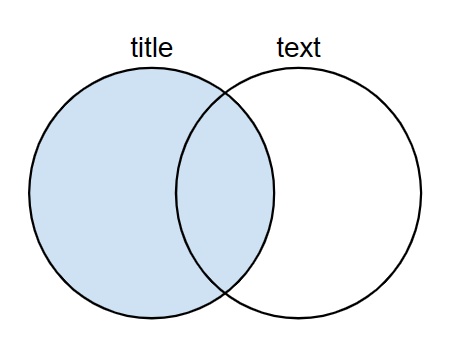

71개의 데이터가 text는 같지만 title이 다른 데이터임    
안도라의 코로나19 범유행 이 부분 자세히 볼 것

In [84]:
drop_du_df = df.copy()
drop_du_df = drop_du_df[drop_du_df.duplicated('text',keep=False)]
print(len(drop_du_df))
# drop_du_df=drop_du_df[['title']].drop_duplicates(keep=False)
drop_du_df=drop_du_df.drop_duplicates('title',keep=False)
print(len(drop_du_df))
# drop_du_df
display(drop_du_df.sort_values(by=['text']))

7677
71


,text,corpus_source,url,domain,title,author,html,document_id
49841,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his armies will rise from the pit"" - episode trailer\n*Episode commentary by MyAnna Buring, James Strong, and Mike Valentine (MP3)\n*""The Impossible Planet"" episode homepage\n* \n* id=2006hi | title=The Impossible Planet"" / ""The Satan Pit|quotes=y\n* \n* \n* \n*BBC Press Office release\n*",위키피디아,None,None,The Satan Pit,None,None,49841
49786,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his armies will rise from the pit"" - episode trailer\n*Episode commentary by MyAnna Buring, James Strong, and Mike Valentine (MP3)\n*""The Impossible Planet"" episode homepage\n* \n* id=2006hi | title=The Impossible Planet"" / ""The Satan Pit|quotes=y\n* \n* \n* \n*BBC Press Office release\n*",위키피디아,None,None,The Impossible Planet,None,None,49786
49063,"2018년 동계 올림픽 크로스컨트리 예선\n올림픽 대회에 앞서 선수 선발전이 진행됐다. 이번 대회에서는 11개 세부종목에 총 310명의 선수가 출전한다. 출전권을 따기 위해서는 거리종목 선발전의 FIS 포인트 100위 이내에 들어야 한다는 A기준이나, 300위 이내에 들어야 한다는 B기준에 해당돼야 한다. A기준을 충족하지 못하는 국가의 경우 B기준을 충족한다는 조건 하에 남녀당 최대 한 명씩 출전시킬 수 있다. 포인트 순위는 2016년 7월 1일부터 2018년 1월 21일까지의 예선기간 동안, 각 선수들이 기록한 최고성적의 평균을 집계하여 매긴다.\n\nFIS 올림픽 포인트 순위에서 30위 이내에 들은 국가가 있다면 추가쿼터를 부여받을 수 있으며 남녀당 최대 두 개까지 받을 수 있다. 또 300위 이내에 들은 선수의 경우에도 남녀당 한 명까지 받을 수 있다. B기준에 따른 쿼터 배분이 진행된 뒤에도 남는 쿼터가 있다면 다시 올림픽 포인트 순위명단을 이용해 재분배한다. 한편 한 국가당 최대 네 명까지만 한 경기에 내보낼 수 있다.",위키피디아,None,None,2018년 동계 올림픽 크로스컨트리 남자 4 X 10km 계주,None,None,49063
49062,"2018년 동계 올림픽 크로스컨트리 예선\n올림픽 대회에 앞서 선수 선발전이 진행됐다. 이번 대회에서는 11개 세부종목에 총 310명의 선수가 출전한다. 출전권을 따기 위해서는 거리종목 선발전의 FIS 포인트 100위 이내에 들어야 한다는 A기준이나, 300위 이내에 들어야 한다는 B기준에 해당돼야 한다. A기준을 충족하지 못하는 국가의 경우 B기준을 충족한다는 조건 하에 남녀당 최대 한 명씩 출전시킬 수 있다. 포인트 순위는 2016년 7월 1일부터 2018년 1월 21일까지의 예선기간 동안, 각 선수들이 기록한 최고성적의 평균을 집계하여 매긴다.\n\nFIS 올림픽 포인트 순위에서 30위 이내에 들은 국가가 있다면 추가쿼터를 부여받을 수 있으며 남녀당 최대 두 개까지 받을 수 있다. 또 300위 이내에 들은 선수의 경우에도 남녀당 한 명까지 받을 수 있다. B기준에 따른 쿼터 배분이 진행된 뒤에도 남는 쿼터가 있다면 다시 올림픽 포인트 순위명단을 이용해 재분배한다. 한편 한 국가당 최대 네 명까지만 한 경기에 내보낼 수 있다.",위키피디아,None,None,2018년 동계 올림픽 크로스컨트리 여자 10km 프리,None,None,49062
49061,"2018년 동계 올림픽 크로스컨트리 예선\n올림픽 대회에 앞서 선수 선발전이 진행됐다. 이번 대회에서는 11개 세부종목에 총 310명의 선수가 출전한다. 출전권을 따기 위해서는 거리종목 선발전의 FIS 포인트 100위 이내에 들어야 한다는 A기준이나, 300위 이내에 들어야 한다는 B기준에 해당돼야 한다. A기준을 충족하지 못하는 국가의 경우 B기준을 충족한다는 조건 하에 남녀당 최대 한 명씩 출전시킬 수 있다. 포인트 순위는 2016년 7월 1일부터 2018년 1월 21일까지의 예선기간 동안, 각 선수들이 기록한 최고성적의 평균을 집계하여 매긴다.\n\nFIS 올림픽 포인트 순위에서 30위 이내에 들은 국가가 있다면 추가쿼터를 부여받을 수 있으며 남녀당 최대 두 개까지 받을 수 있다. 또 300위 이내에 들은 선수의 경우에도 남녀당 한 명까지 받을 수 있다. B기준에 따른 쿼터 배분이 진행된 뒤에도 남는 쿼터가 있다면 다시 올림픽 포인트 순위명단을 이용해 재분배한다. 한편 한 국가당 최대 네 명까지만 한 경기에 내보낼 수 있다.",위키피디아,None,None,2018년 동계 올림픽 크로스컨트리 남자 15km 프리,None,None,49061
45010,"武官石人像 역시 화강암으로 조성되었고 2基 남아 있다. 유형문화재 제 42-4호는 4基의 石人像 가운데서 가장 보존이 잘 되어 있다. 두 武官石人像 중 제 42-5호가 키가 약간 크게 조각되었다\n\n文官石人像과 비교하면, 武官石人像은 전체적으로 몸의 굴곡이 더 살아 있고, 얼굴도 보다 생동감있게 표현되었으며, 장식과 문양이 더 화려하게 표현된 갑옷을 착용하고 있다. 크게 부릅뜬 눈과 큼직한 주먹코, 도톰한 양 볼과 꾹 다문 입 모양 등은 험상궂으면서도 귀여운 인상을 풍긴다. 다만, 제 42-5호는 발굴 당시 頭部가 지표면에 노출되어 있던 관계로 코 부분이 깨져 있다\n\n갑옷에는 끈 장식 등 각종 장식과 솟을고리문․如意頭紋․忍冬草紋 등의 문양이 화려하게 표현되어 있다. 그러나 제 42-5호는 가슴 부위에 나타난 끈 장식이 魚鱗紋의 胸甲위에 나타난다는 점에서 밋밋한 바탕 위에 그러한 장식이 나타나는 제 42-4호와 차이를 보이고 있다. 甲冑도 대체로 비슷하나 上位의 옷깃에 새긴 忍冬草紋에서 약간 차이를 보이고 있다\n\n한편 허리 아래를 두른 肋甲의 측면에 표현된 수 겹의 주름과 아래로 늘어진 도포자락에 나타난 Ω의 주름 표현은 정지된 石人像에 생동감을 부여하는 요소가 되고 있다. 또 武官石人像답게 칼집에서 칼을 빼 손으로 짚고 있는 모습을 나타냈는데, 손의 모양에서 2基는 서로 차이를 보이고 있다. 즉, 제 42-4호는 제 42-5호와 반대로 오른손이 겉에서 왼손을 감싸 안고 있는 형상을 하고 있는 것이다",위키피디아,None,None,구 영릉 석물 - 무관석인상1,None,None,45010
45011,"武官石人像 역시 화강암으로 조성되었고 2基 남아 있다. 유형문화재 제 42-4호는 4基의 石人像 가운데서 가장 보존이 잘 되어 있다. 두 武官石人像 중 제 42-5호가 키가 약간 크게 조각되었다\n\n文官石人像과 비교하면, 武官石人像은 전체적으로 몸의 굴곡이 더 살아 있고, 얼굴도 보다 생동감있게 표현되었으며, 장식과 문양이 더 화려하게 표현된 갑옷을 착용하고 있다. 크게 부릅뜬 눈과 큼직한 주먹코, 도톰한 양 볼과 꾹 다문 입 모양 등은 험상궂으면서도 귀여운 인상을 풍긴다. 다만, 제 42-5호는 발굴 당시 頭部가 지표면에 노출되어 있던 관계로 코 부분이 깨져 있다\n\n갑옷에는 끈 장식 등 각종 장식과 솟을고리문․如意頭紋․忍冬草紋 등의 문양이 화려하게 표현되어 있다. 그러나 제 42-5호는 가슴 부위에 나타난 끈 장식이 魚鱗紋의 胸甲위에 나타난다는 점에서 밋밋한 바탕 위에 그러한 장식이 나타나는 제 42-4호와 차이를 보이고 있다. 甲冑도 대체로 비슷하나 上位의 옷깃에 새긴 忍冬草紋에서 약간 차이를 보이고 있다\n\n한편 허리 아래를 두른 肋甲의 측면

✅ 위키피디아 데이터 전처리는 title, text 완전히 겹치는 데이터를 중복제거하는 것 빼고는 필요 없을 것 같음

# MRC dataset

In [1]:
from datasets import load_from_disk
dataset = load_from_disk("../input/data/train_dataset/")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
        num_rows: 240
    })
})


In [2]:
dataset['train']

Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 3952
})

In [4]:
dataset['train'][0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [5]:
df = pd.DataFrame( dataset['train'] )

In [6]:
df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,"미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\n\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05",대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,"'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 1950년대이다. 2차 세계대전을 마치고, 6.25전쟁의 시기로 유럽은 전후 재건에 집중하고, 유럽 제국주의의 식민지가 독립하여 아프리카, 아시아, 아메리카 대륙에서 신생국가가 형성되는 시기였고, 미국은 전쟁 이후 경제적 변화에 기업이 적응을 해야 하던 시기였다. 특히 1954년 피터 드러커의 저서 《경영의 실제》는 현대적 경영의 기준을 제시하여서, 기존 근대적 인사조직관리를 넘어선 현대적 인사조직관리의 전환점이 된다. 드러커는 경영자의 역할을 강조하며 경영이 현시대 최고의 예술이자 과학이라고 주장하였고 , 이 주장은 21세기 인사조직관리의 역할을 자리매김했다.\n\n현대적 인사조직관리와 근대 인사조직관리의 가장 큰 차이는 통합이다. 19세기의 영향을 받던 근대적 경영학(고전적 경영)의 흐름은 기능을 강조하였지만, 1950년대 이후의 현대 경영학은 통합을 강조하였다. 기능이 분화된 '기계적인 기업조직' 이해에서 다양한 기능을 인사조직관리의 목적, 경영의 목적을 위해서 다양한 분야를 통합하여 '유기적 기업 조직' 이해로 전환되었다. 이 통합적 접근방식은 과정, 시스템, 상황을 중심으로 하는 인사조직관리 방식을 형성했다.",현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,"강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전제 독재의 가능성이 보일 수도 있었으나, 스스로 황권을 조절하고 정치의 일부는 재상들이나 대신들과 의논하였으며 당시 궁핍하게 살고 있는 한족들의 사정을 잘 알고 있던 한족 대신들의 의견을 수용하여 정책을 실행하고 선정을 베풀었다. 프랑스의 예수회 선교사 부베는 루이 14세에게 다음과 같이 보고하였다. \n강희제는 세상에서 가장 부유한 군주입니다. 그럼에도 황제인 그의 생활용품들은 사치스러움과 화려함과는 거리가 멀다 못해 소박하기 그지없습니다. 역대 제왕들 가운데 전례없는 일입니다.\n강희제 스스로도 자신이 직접 쓴 《근검록》에서 다음과 같이 쓰고 있다\n모든 비용은 백성들의 피땀으로 얻어진 것이니 주인된 황제로서 절제하고 절제함은 당연한 것이 아닌가\n\n이런 강희제의 인자한 정치는 한족이 만주족의 청나라를 지지하게 만드는 데에 크게 일조하였다. 1717년(강희 56년) 강희제는 〈고별상유〉(告別上諭), 즉 마지막으로 백성들에게 바치는 글을 남겼는데 강희제는 “한 가지 일에 부지런하지 않으면 온 천하에 근심을 끼치고, 한 순간에 부지런하지 않으면 천추만대에 우환거리를 남긴다.”라고 역설하였다. 또한 “제왕이 천하를 다스림에 능력이 있는 자를 가까이 두고, 백성들의 세금을 낮추어 주어야 하며, 백성들의 마음을 하나로 묶고, 위태로움이 생기기 전에 나라를 보호하며, 혼란이 있기 전에 이를 먼저 파악하여 잘 다스리고, 관대하고 엄격함의 조화를 이루어 나라를 위한 계책을 도모해야 한다.”라고 후대의 황제에게도 이를 훈계하였다. 강희제는 황제로서 자식과 같은 백성들에게 이런 당부의 말을 남겨 황제로서의 도리를 다하려 하였다.",강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든 것을 불감(佛龕)이라고 한다. 불감은 그 안에 모신 불상의 양식뿐만 아니라, 당시의 건축 양식을 함께 살필 수 있는 중요한 자료가 된다. \n\n이 작품은 높이 18cm의 작은 불감으로, 청동으로 불감과 불상을 만들고 그 위에 금칠을 하였다. 불감 내부를 살펴보면 난간을 두른 사각형의 기단 위에 본존불과 양 옆에 보살상이 있으며, 그 위에 기둥과 지붕으로 된 뚜껑이 덮혀 있다. 법당 모양의 뚜껑에는 앞면과 양쪽에 커다란 창문이 있어서 안에 모셔진 불상을 잘 볼 수 있도록 하였다.\n\n본존불은 얼굴이 추상적이고, 양 어깨를 감싸고 있는 옷은 주름을 간략한 선으로 표현했다. 몸 뒤편에 있는 광배(光背)는 머리광배와 몸광배로 나누어져 있으며, 불꽃무늬로 가장자리를 장식하고 있다. 본존불 양 옆의 보살상도 구슬로 장식된 관(冠)을 쓰고 있다는 점을 제외하면 형식이나 표현 수법이 본존불과 유사하다.\n\n불감은 지금도 금색이 찬란하고 지붕에 녹청색이 남아 있는 등 전체적인 보존 상태가 양호하다. 본존불의 긴 허리, 불규칙하게 나타나는 옷주름, 그리고 보살이 쓰고 있는 구슬로 장식한 관(冠) 등 여러 양식으로 보아 만든 시기는 중국 북방 계통의 영향을 받은 11∼12세기 경으로 추정된다. 이 작품은 고려시대 또는 그 이전의 목조건축 양식과 조각수법을 보여주는 귀중한 예라는 점에서 가치가 크다고 할 수 있다.",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,"동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기의 유물로, 경상남도 울주군 웅촌면 대복리에서 출토되었다고 전한다. 외함(外函)은 청화명문이 있는 백자이며, 그 안쪽에 납작한 금속제 원형 합 2점과 금속제 원통형 합 등 3점의 그릇이 봉안되어 있다.\n\n바깥쪽의 외함인 백자 합 동체 중앙부 표면에 청화안료로 쓴 “癸巳二月日 施主承表 兩主”라는 명문이 세로로 세 줄에 걸쳐서 쓰여 있어 조선 후기인 계사년에 시주자인 승표 부부가 발원하여 만든 것임을 알 수 있다.\n\n동아대학교박물관의 계사명 사리구는 정확한 제작연대는 알 수 없지만 명문 등을 통해 적어도 17세기 이후에 제작된 것으로 추정되는 작품으로, 명문이 있는 조선 후기 경상도 지역 출토 사리장엄구라는 점에서 중요한 가치를 지닌 작품으로 판단된다.\n\n조선 후기 사

결측값

In [20]:
train_df = pd.DataFrame( dataset['train'] )
print('train 결측치-------------')
display(train_df.isnull().sum())
val_df = pd.DataFrame( dataset['validation'] )
print('valid 결측치-------------')
display(val_df.isnull().sum())

train 결측치-------------


title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64

valid 결측치-------------


title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64

`결측값은 없음`

In [22]:
counter = Counter(df.document_id)
counter = dict(sorted(counter.items(), key=lambda x: x[1],reverse=True))
print(len(counter))
counter

3340


{5284: 4,
 5322: 3,
 8428: 3,
 4633: 3,
 7872: 3,
 6216: 3,
 6033: 3,
 7870: 3,
 8264: 3,
 6998: 3,
 4883: 3,
 4926: 3,
 7623: 3,
 6964: 3,
 4929: 3,
 8051: 3,
 5194: 3,
 60263: 3,
 7582: 3,
 6653: 3,
 4917: 3,
 8190: 3,
 6488: 3,
 6943: 3,
 6716: 3,
 8731: 3,
 7139: 3,
 7833: 3,
 5511: 3,
 7445: 3,
 6723: 3,
 5463: 3,
 5028: 2,
 47334: 2,
 37482: 2,
 12023: 2,
 19308: 2,
 6930: 2,
 51125: 2,
 42889: 2,
 8208: 2,
 4936: 2,
 54152: 2,
 12186: 2,
 6204: 2,
 14083: 2,
 34757: 2,
 39517: 2,
 16753: 2,
 26988: 2,
 53921: 2,
 59965: 2,
 13975: 2,
 43992: 2,
 7119: 2,
 44197: 2,
 5609: 2,
 36052: 2,
 57963: 2,
 5219: 2,
 26246: 2,
 48379: 2,
 25068: 2,
 18532: 2,
 46770: 2,
 7887: 2,
 7464: 2,
 13342: 2,
 53017: 2,
 30080: 2,
 7088: 2,
 26108: 2,
 28749: 2,
 28730: 2,
 6736: 2,
 27366: 2,
 9868: 2,
 6016: 2,
 7951: 2,
 39694: 2,
 48844: 2,
 29882: 2,
 5536: 2,
 36471: 2,
 51769: 2,
 31222: 2,
 5595: 2,
 13765: 2,
 10782: 2,
 6704: 2,
 21735: 2,
 6703: 2,
 8833: 2,
 14163: 2,
 20662: 2,
 33554

In [23]:
df[df['document_id']==5284]

,title,context,question,id,answers,document_id,__index_level_0__
201,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한 부정적인 생각을 갖게 되었다. 미국 체류 중 황인종을 멸시하는 백인 불량배들에게 끌려가 가끔 얻어맞기도 하고, “유색 인종”이라는 이유로 호텔 투숙을 거절당해 정거장에서 밤을 지샜는가 하면, 세례 교인이었던 그와 가장 가까워야 할 미국인 선교사에게마저 늘 은근히 - 그리고 가끔은 매우 노골적으로 - “왕따”당하는 처지였다 귀국 이후에 조선에서 만난 미국인 선교사들도 비슷하게 그를 대우했다.\n\n당시의 그에 대해 후일 노르웨이 오슬로 대학 교수 박노자는 '백인 인종주의에 상처받아 만신창이가 되었을 그의 마음 상태 '를 지적하기도 했다.\n\n만약 내가 마음대로 내 고국을 선택할 수 있다면, 나는 일본을 선택할 것이다. 오, 축복받은 일본이여! 동방의 낙원이여! |1893년 11월 1일자 일기 \n\n그는 평소 조선인들의 불결한 위생과 겉치레, 감정적 대응 등을 내심 경멸해왔다. 그리고 서구의 기독교사상과 일한 만큼만 대가를 받는다는 청교도 정신, 합리주의의 수용을 통해 이를 개선하려 했다. 그러나 평소 기독교선교사들로부터도 자기 일 처리도 못하는 작은 아이, 원주민, 예의를 지키지 않아도 될 만한 사람의 대접을 늘 받아 온 윤치호는, 인종주의야말로 미국의 가장 중요한 특징이라는 결론을 내리게 되었다 그 뒤 그는 조선에도 민주주의와 자유주의, 기독교 정신의 도입이 시급하다고 봤다. 그러나 미국의 민주주의와 자유주의, 기독교 사상과 개척정신은 높이 평가하면서도 내심 백인종을 혐오하는 이중적인 태도와 인종주의적인 사고를 갖게 되었다.\n\n어느 교회에서 남부 출신 남감리교회 목사들이 예배 시간에 흑인을 박멸해야 된다는 설교, 흑인들을 아프리카로 추방해야 된다는 설교를 듣고는 충격을 받기도 했다 그들이 목사인가 기독교인인가 자체를 의심하기도 했다. 하지만 흑인이 백인들로부터 차별대우를 받는 것에는 분노하면서도 흑인에 대해서는 1893년 2월 17일자 일기에 '(아프리카인들이 미국에 끌려와) 영어를 배운 것만으로도 그들의 노예생활에 대해 충분히 보상받은 것이다. 라는 이중적인 시각을 갖게 된다. 귀국 이후 그는 국내 인사들이 미국을 무조건적으로 의존하거나 일제와는 다른 선량한 국가일 것이라는 생각을 비판, 경계하기도 했다.",평상시 기독교선교사들로부터 차별적 대우를 받은 윤치호가 생각한 미국의 중대한 속성은?,mrc-0-001069,"{'answer_start': [645], 'text': ['인종주의']}",5284,705
1426,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한 부정적인 생각을 갖게 되었다. 미국 체류 중 황인종을 멸시하는 백인 불량배들에게 끌려가 가끔 얻어맞기도 하고, “유색 인종”이라는 이유로 호텔 투숙을 거절당해 정거장에서 밤을 지샜는가 하면, 세례 교인이었던 그와 가장 가까워야 할 미국인 선교사에게마저 늘 은근히 - 그리고 가끔은 매우 노골적으로 - “왕따”당하는 처지였다 귀국 이후에 조선에서 만난 미국인 선교사들도 비슷하게 그를 대우했다.\n\n당시의 그에 대해 후일 노르웨이 오슬로 대학 교수 박노자는 '백인 인종주의에 상처받아 만신창이가 되었을 그의 마음 상태 '를 지적하기도 했다.\n\n만약 내가 마음대로 내 고국을 선택할 수 있다면, 나는 일본을 선택할 것이다. 오, 축복받은 일본이여! 동방의 낙원이여! |1893년 11월 1일자 일기 \n\n그는 평소 조선인들의 불결한 위생과 겉치레, 감정적 대응 등을 내심 경멸해왔다. 그리고 서구의 기독교사상과 일한 만큼만 대가를 받는다는 청교도 정신, 합리주의의 수용을 통해 이를 개선하려 했다. 그러나 평소 기독교선교사들로부터도 자기 일 처리도 못하는 작은 아이, 원주민, 예의를 지키지 않아도 될 만한 사람의 대접을 늘 받아 온 윤치호는, 인종주의야말로 미국의 가장 중요한 특징이라는 결론을 내리게 되었다 그 뒤 그는 조선에도 민주주의와 자유주의, 기독교 정신의 도입이 시급하다고 봤다. 그러나 미국의 민주주의와 자유주의, 기독교 사상과 개척정신은 높이 평가하면서도 내심 백인종을 혐오하는 이중적인 태도와 인종주의적인 사고를 갖게 되었다.\n\n어느 교회에서 남부 출신 남감리교회 목사들이 예배 시간에 흑인을 박멸해야 된다는 설교, 흑인들을 아프리카로 추방해야 된다는 설교를 듣고는 충격을 받기도 했다 그들이 목사인가 기독교인인가 자체를 의심하기도 했다. 하지만 흑인이 백인들로부터 차별대우를 받는 것에는 분노하면서도 흑인에 대해서는 1893년 2월 17일자 일기에 '(아프리카인들이 미국에 끌려와) 영어를 배운 것만으로도 그들의 노예생활에 대해 충분히 보상받은 것이다. 라는 이중적인 시각을 갖게 된다. 귀국 이후 그는 국내 인사들이 미국을 무조건적으로 의존하거나 일제와는 다른 선량한 국가일 것이라는 생각을 비판, 경계하기도 했다.",윤치호가 미국의 특징이 인종주의라고 생각하게 만든 인물은?,mrc-1-000949,"{'answer_start': [570], 'text': ['기독교선교사들']}",5284,615
1622,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한 부정적인 생각을 갖게 되었다. 미국 체류 중 황인종을 멸시하는 백인 불량배들에게 끌려가 가끔 얻어맞기도 하고, “유색 인종”이라는 이유로 호텔 투숙을 거절당해 정거장에서 밤을 지샜는가 하면, 세례 교인이었던 그와 가장 가까워야 할 미국인 선교사에게마저 늘 은근히 - 그리고 가끔은 매우 노골적으로 - “왕따”당하는 처지였다 귀국 이후에 조선에서 만난 미국인 선교사들도 비슷하게 그를 대우했다.\n\n당시의 그에 대해 후일 노르웨이 오슬로 대학 교수 박노자는 '백인 인종주의에 상처받아 만신창이가 되었을 그의 마음 상태 '를 지적하기도 했다.\n\n만약 내가 마음대로 내 고국을 선택할 수 있다면, 나는 일본을 선택할 것이다. 오, 축복받은 일본이여! 동방의 낙원이여! |1893년 11월 1일자 일기 \n\n그는 평소 조선인들의 불결한 위생과 겉치레, 감정적 대응 등을 내심 경멸해왔다. 그리고 서구의 기독교사상과 일한 만큼만 대가를 받는다는 청교도 정신, 합리주의의 수용을 통해 이를 개선하려 했다. 그러나 평소 기독교선교사들로부터도 자기 일 처리도 못하는 작은 아이, 원주민, 예의를 지키지 않아도 될 만한 사람의 대접을 늘 받아 온 윤치호는, 인종주의야말로 미국의 가장 중요한 특징이라는 결론을 내리게 되었다 그 뒤 그는 조선에도 민주주의와 자유주의, 기독교 정신의 도입이 시급하다고 봤다. 그러나 미국의 민주주의와 자유주의, 기독교 사상과 개척정신은 높이 평가하면서도 내심 백인종을 혐오하는 이중적인 태도와 인종주의적인 사고를 갖게 되었다.\n\n어느 교회에서 남부 출신 남감리교회 목사들이 예배 시간에 흑인을 박멸해야 된다는 설교, 흑인들을 아프리카로 추방해야 된다는 설교를 듣고는 충격을 받기도 했다 그들이 목사인가 기독교인인가 자체를 의심하기도 했다. 하지만 흑인이 백인들로부터 차별대우를 받는 것에는 분노하면서도 흑인에 대해서는 1893년 2월 17일자 일기에 '(아프리카인들이 미국에 끌려와) 영어를 배운 것만으로도 그들의 노예생활에 대해 충분히 보상받은 것이다. 라는 이중적인 시각을 갖게 된다. 귀국 이후 그는 국내 인사들이 미국을 무조건적으로 의존하거나 일제와는 다른 선량한 국가일 것이라는 생각을 비판, 경계하기도 했다.",조선에서도 윤치호를 유색 인종이라는 이유로 차별한 사람은?,mrc-0-000476,"{'answer_start': [254], 'text': ['미국인 선교사']}",5284,323
2199,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한 부정적인 생각을 갖게 되었다. 미국 체류 중 황인종을 멸시하는 백인 불량배들에게 끌려가 가끔 얻어맞기도 하고, “유색 인종”이라는 이유로

✅ 같은 doc에 여러 개의 질문

그래도 중복값 : 없음

In [97]:
drop_du_df = df.copy()
len_before = len(df)
drop_du_df=drop_du_df[['context','question']].drop_duplicates().reset_index(drop=True)
len_after = len(drop_du_df)
print(f'text, title 기준 중복 제거된 개수: {len_before-len_after}개')

text, title 기준 중복 제거된 개수: 0개


context문장 길이

Text(0.5, 1.0, 'validation context 문장 길이')

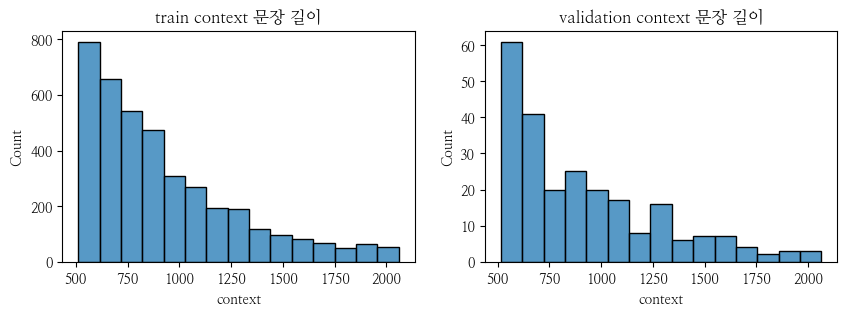

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10, 3))
df = pd.DataFrame( dataset['train'] )
sns.histplot(data=df['context'].apply(lambda x: len(x)), ax=ax[0], bins=15)
ax[0].set_title('train context 문장 길이')
df = pd.DataFrame( dataset['validation'] )
sns.histplot(data=df['context'].apply(lambda x: len(x)), ax=ax[1], bins=15)
ax[1].set_title('validation context 문장 길이')

context에 있는 쓸모 없는 문장 부호 확인

In [89]:
def flatten(l):
    result =[]
    for item in l:
        result.extend(item)
    return result

counter = Counter(flatten(df['context'].apply(lambda x: re.findall('[\s]+|[\\\\n]+',x))))
# counter = Counter(flatten(df['context'].apply(lambda x: re.findall('\\\\n+',x))))
counter = dict(sorted(counter.items(), key=lambda x: x[1],reverse=True))
print(len(counter))
counter

9


{' ': 807067,
 '\\n\\n': 10337,
 '\\n': 1873,
 'n': 969,
 '\\n\\n\\n': 53,
 'nn': 25,
 '\\n\\n\\n\\n': 23,
 '\u3000': 4,
 '\\n\\n\\n\\n\\n': 2}

In [95]:
df[df['context'].str.contains('\u3000') ].head(2)

,title,context,question,id,answers,document_id,__index_level_0__,answer
201,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한 부정적인 생각을 갖게 되었다. 미국 체류 중 황인종을 멸시하는 백인 불량배들에게 끌려가 가끔 얻어맞기도 하고, “유색 인종”이라는 이유로 호텔 투숙을 거절당해 정거장에서 밤을 지샜는가 하면, 세례 교인이었던 그와 가장 가까워야 할 미국인 선교사에게마저 늘 은근히 - 그리고 가끔은 매우 노골적으로 - “왕따”당하는 처지였다 귀국 이후에 조선에서 만난 미국인 선교사들도 비슷하게 그를 대우했다.\n\n당시의 그에 대해 후일 노르웨이 오슬로 대학 교수 박노자는 '백인 인종주의에 상처받아 만신창이가 되었을 그의 마음 상태 '를 지적하기도 했다.\n\n만약 내가 마음대로 내 고국을 선택할 수 있다면, 나는 일본을 선택할 것이다. 오, 축복받은 일본이여! 동방의 낙원이여! |1893년 11월 1일자 일기 \n\n그는 평소 조선인들의 불결한 위생과 겉치레, 감정적 대응 등을 내심 경멸해왔다. 그리고 서구의 기독교사상과 일한 만큼만 대가를 받는다는 청교도 정신, 합리주의의 수용을 통해 이를 개선하려 했다. 그러나 평소 기독교선교사들로부터도 자기 일 처리도 못하는 작은 아이, 원주민, 예의를 지키지 않아도 될 만한 사람의 대접을 늘 받아 온 윤치호는, 인종주의야말로 미국의 가장 중요한 특징이라는 결론을 내리게 되었다 그 뒤 그는 조선에도 민주주의와 자유주의, 기독교 정신의 도입이 시급하다고 봤다. 그러나 미국의 민주주의와 자유주의, 기독교 사상과 개척정신은 높이 평가하면서도 내심 백인종을 혐오하는 이중적인 태도와 인종주의적인 사고를 갖게 되었다.\n\n어느 교회에서 남부 출신 남감리교회 목사들이 예배 시간에 흑인을 박멸해야 된다는 설교, 흑인들을 아프리카로 추방해야 된다는 설교를 듣고는 충격을 받기도 했다 그들이 목사인가 기독교인인가 자체를 의심하기도 했다. 하지만 흑인이 백인들로부터 차별대우를 받는 것에는 분노하면서도 흑인에 대해서는 1893년 2월 17일자 일기에 '(아프리카인들이 미국에 끌려와) 영어를 배운 것만으로도 그들의 노예생활에 대해 충분히 보상받은 것이다. 라는 이중적인 시각을 갖게 된다. 귀국 이후 그는 국내 인사들이 미국을 무조건적으로 의존하거나 일제와는 다른 선량한 국가일 것이라는 생각을 비판, 경계하기도 했다.",평상시 기독교선교사들로부터 차별적 대우를 받은 윤치호가 생각한 미국의 중대한 속성은?,mrc-0-001069,"{'answer_start': [645], 'text': ['인종주의']}",5284,705,인종주의
1426,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한 부정적인 생각을 갖게 되었다. 미국 체류 중 황인종을 멸시하는 백인 불량배들에게 끌려가 가끔 얻어맞기도 하고, “유색 인종”이라는 이유로 호텔 투숙을 거절당해 정거장에서 밤을 지샜는가 하면, 세례 교인이었던 그와 가장 가까워야 할 미국인 선교사에게마저 늘 은근히 - 그리고 가끔은 매우 노골적으로 - “왕따”당하는 처지였다 귀국 이후에 조선에서 만난 미국인 선교사들도 비슷하게 그를 대우했다.\n\n당시의 그에 대해 후일 노르웨이 오슬로 대학 교수 박노자는 '백인 인종주의에 상처받아 만신창이가 되었을 그의 마음 상태 '를 지적하기도 했다.\n\n만약 내가 마음대로 내 고국을 선택할 수 있다면, 나는 일본을 선택할 것이다. 오, 축복받은 일본이여! 동방의 낙원이여! |1893년 11월 1일자 일기 \n\n그는 평소 조선인들의 불결한 위생과 겉치레, 감정적 대응 등을 내심 경멸해왔다. 그리고 서구의 기독교사상과 일한 만큼만 대가를 받는다는 청교도 정신, 합리주의의 수용을 통해 이를 개선하려 했다. 그러나 평소 기독교선교사들로부터도 자기 일 처리도 못하는 작은 아이, 원주민, 예의를 지키지 않아도 될 만한 사람의 대접을 늘 받아 온 윤치호는, 인종주의야말로 미국의 가장 중요한 특징이라는 결론을 내리게 되었다 그 뒤 그는 조선에도 민주주의와 자유주의, 기독교 정신의 도입이 시급하다고 봤다. 그러나 미국의 민주주의와 자유주의, 기독교 사상과 개척정신은 높이 평가하면서도 내심 백인종을 혐오하는 이중적인 태도와 인종주의적인 사고를 갖게 되었다.\n\n어느 교회에서 남부 출신 남감리교회 목사들이 예배 시간에 흑인을 박멸해야 된다는 설교, 흑인들을 아프리카로 추방해야 된다는 설교를 듣고는 충격을 받기도 했다 그들이 목사인가 기독교인인가 자체를 의심하기도 했다. 하지만 흑인이 백인들로부터 차별대우를 받는 것에는 분노하면서도 흑인에 대해서는 1893년 2월 17일자 일기에 '(아프리카인들이 미국에 끌려와) 영어를 배운 것만으로도 그들의 노예생활에 대해 충분히 보상받은 것이다. 라는 이중적인 시각을 갖게 된다. 귀국 이후 그는 국내 인사들이 미국을 무조건적으로 의존하거나 일제와는 다른 선량한 국가일 것이라는 생각을 비판, 경계하기도 했다.",윤치호가 미국의 특징이 인종주의라고 생각하게 만든 인물은?,mrc-1-000949,"{'answer_start': [570], 'text': ['기독교선교사들']}",5284,615,기독교선교사들


✅ \\n\\n 이런 것들은 없애야 할 듯

In [ ]:
'\\n\\n','\\n', '\\n\\n\\n', '\\n\\n\\n\\n','\u3000','\\n\\n\\n\\n\\n'

## 답변 분석

In [31]:
print('답변 길이')
df['answers'].apply(lambda x: len(x['text'])).unique()

답변 길이


array([1])

답변 내용 list만들어 확인

In [33]:
list(df['answers'].apply(lambda x: x['text'][0]).unique())

['하원',
 '《경영의 실제》',
 '백성',
 '중국',
 '4개',
 '드래곤',
 '형양태수 왕식',
 '이탈리아군',
 '큰아들 유',
 '왕대마을',
 '음독자살',
 '출장 잦은 건축가',
 '반신화적인 인물인 우파',
 '1951년',
 '예수',
 "'초일기'",
 '1916년',
 '레드삭스',
 '삼판동',
 '다산 정약용',
 '대나라',
 '10달러',
 '1945년',
 '사립 김노인 고등학교',
 '체벽에 잇는 감지기',
 '근대철학',
 '215km',
 '마커트리로 장식을 한 트롱프 뢰유',
 '아르투로',
 '조립 라인',
 '우전왕(優塡王)식 착의법',
 '친구',
 '2015년',
 '케이스 커크',
 '직사각형',
 '상인',
 '지상요원들',
 '시조 거인',
 "'발라즈 찬 카이이'",
 '1964년 12월 12일',
 'NADPH',
 '그리고리 신부(Father Grigori)',
 '헌법 제12조 제3항',
 '1907년까지',
 '부근 북동부',
 '덱',
 '평사낙안형',
 '집정관',
 '2004년',
 '2002',
 '빌 비크',
 '사대부',
 '19 K 이하',
 '이탈리아 피아트 사',
 '임수정',
 '깨진 술잔',
 '공산주의',
 '≪인간의 이해: 개념의 집단적 사용 및 진화 (1972)≫',
 '경례',
 '상원',
 '14세기',
 '〈마브루공(公)〉',
 '마수드의 군대',
 '라틴어',
 '핑둥현',
 '나고야',
 '1753년',
 '새로 조직된 훈련대의 제1대 대대장',
 '장시성',
 '왕권',
 '표트르 1세',
 '하세가와 마나미',
 '독립 선언식',
 '평형상태',
 '리더',
 '〈성당과 시장〉(The Cathedral and the Bazaar)',
 '바순',
 '골',
 '마케도니아의 장군 알렉산더 3세',
 '2000년',
 "'길버트 에드워드'",
 '소련',
 '오아하카주',
 '〈목포의 눈물〉',
 '일본',
 '상사병',
 '송기중 교수',
 '의사',
 '벵

 `답변 중 눈에 띄었던 답변들`    
 '《경영의 실제》',"'초일기'", '우전왕(優塡王)식 착의법', '〈마브루공(公)〉', '〈성당과 시장〉(The Cathedral and the Bazaar)', '‘전의식’(前意識)',
 '우루시올(urushiol)','“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”',

In [42]:
df['answer'] = df['answers'].apply(lambda x: x['text'][0])

### 긴 문장

In [44]:
df[df['answer'] == '“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”']

,title,context,question,id,answers,document_id,__index_level_0__,answer
996,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명을 권유받았으나 거절했고, 이는 실망한 일부 학생들로부터 비판을 받게 된다. 그는 이 민족적인 거사를 순진한 애국심에 기초한 민족주의자들의 무모한 행동으로 파악했다. 그는 한일병합 이후에도 신문과 방송매체를 통해 선전, 선동을 하는 지식인들을 혐오하고 경멸했다. 윤치호에 의하면 그들은 '자신들은 죽을 용기도 없으면서 다른 순진한 사람들을 죽음의 골짜기로 몰고 가는 저주받을 악마와 같은 존재들'이었다.\n\n이번 운동에 반대하는 세 가지 이유는 이렇다. 조선 문제는 파리강화회의에 상정되지 않을 것이다. 어떤 나라도 조선독립을 위해 일본과 싸우는모험을 감행하지는 않을 것이다. 약자가 취할 수 있는 최선의 방책은 강자의 호감을 사는 것이다|1919년 3월 6일\n\n그는 젊은이들을 무책임하게 죽음으로 몰고간다며 일부 민족대표와 독립운동가를 무책임한 인사라고 비판했다. 오히려 그는 이러한 선동이 독립을 불러오기는커녕 일본 제국주의자들에게 한국인들을 더욱 가혹하고 엄하게 다룰 구실만 제공할 뿐이라고 내다봤다.\n\n 3.1 만세 운동의 실패를 예견한 그는 만세 운동이 한참 진행 중이던 3월 2일자의 일기에서 학생들을 앞세운 뒤, 만세 대열에서 슬그머니 발을 뺀 기독교, 천도교계 인사들을 음모꾼들이라며 규탄했다 3ㆍ1운동 후 구치소에 수감되는 여학생들의 모습에서는 일제 경찰에 대한증오와 분노로 밤새워 괴로워했다 이후 3월 5일~3월 7일 그는 시내를 다니며 만세 시위 직후의 동태를 파악했다. 3월 7일 기자 회견을 통해 다음과 같은 담화문을 발표하기도 했다.\n\n강자와 서로 화합하고 서로 아껴 가는 데에는 약자가 항상 순종해야만 강자에게 애호심을 불러일으키게 해서 평화의 기틀이 마련되는 것입니다마는, 만약 약자가 강자에 대해서 무턱대고 대든다면 강자의 노여움을 사서 결국 약자 자신을 괴롭히는 일이 됩니다. 그런 뜻에서도 조선은 내지에 대해서 그저 덮어 놓고 불온한 언동을 부리는 것은 이로운 일이 못됩니다.|윤치호|경성일보 1919년 3월 7일\n\n이 상황에 대해서, 일부 학자는 그 당시에, 윤치호가 '(조선의) 독립은 불가능하며 일제에 저항을 할 필요가 없다고 생각'했다고 주장한다. 자신의 일기에도 “나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”(윤치호 일기, 1919년 10월 1일자)라고 썼다. 이때문에 일부 독립운동 지도자들로부터 비난을 받기도 했다. 한편 3·1 만세 운동을 주도한 민족대표의 1인인 권동진을 만났는데, 윤치호는 그로부터 처음에는 평화적인 선언서 낭독으로 이를 통해 신문 뉴스로 국제사회에 한국의 독립을 알리기로 결정했으나 학생들이 갑자기 감정이 격해져서 감정적인 시위로 변질됐다는 이야기를 듣게 된다. 권동진이 처음 찾아왔을 때 그는 경멸적인 태도로 대하였으나, 그의 이야기를 듣고 다소 감정적인 태도에서 한발 누그러졌다.\n\n호찌민의 실패를 예견한 그는 파리강화회의에 기대를 거는 한국인 독립운동가들의 기대 역시 좌절될 것이라고 내다봤다. 파리강화회의에서 한국 문제는 상정되지 않았고, 이후 김규식, 여운형 등은 소련 등 사회주의세력에, 송진우 등은 실력양성론으로 노선을 전환한다.",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,mrc-0-002792,"{'answer_start': [1122], 'text': ['“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”']}",5307,1833,“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”


답변길이

Text(0.5, 1.0, 'answer 문장 길이')

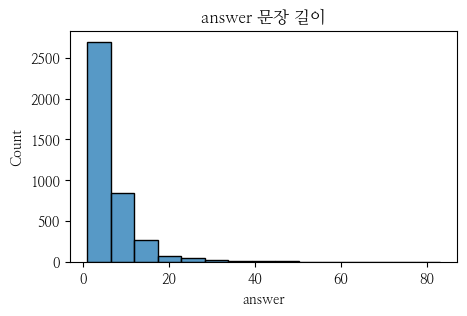

In [45]:
fig, ax = plt.subplots(1,1,figsize=(5, 3))
sns.histplot(data=df['answer'].apply(lambda x: len(x)), ax=ax, bins=15)
ax.set_title('answer 문장 길이')

In [50]:
max_length = max(list(df['answer'].apply(lambda x: len(x))))
print(f'max length of answer text: {max_length}')

max length of answer text: 83


대부분이 간단한 어절, 긴 문장도 있음

In [52]:
df_len = df.copy()
df_len['len']=df['answer'].apply(lambda x: len(x))
df_len[df_len['len']==max_length]

,title,context,question,id,answers,document_id,__index_level_0__,answer,len
996,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명을 권유받았으나 거절했고, 이는 실망한 일부 학생들로부터 비판을 받게 된다. 그는 이 민족적인 거사를 순진한 애국심에 기초한 민족주의자들의 무모한 행동으로 파악했다. 그는 한일병합 이후에도 신문과 방송매체를 통해 선전, 선동을 하는 지식인들을 혐오하고 경멸했다. 윤치호에 의하면 그들은 '자신들은 죽을 용기도 없으면서 다른 순진한 사람들을 죽음의 골짜기로 몰고 가는 저주받을 악마와 같은 존재들'이었다.\n\n이번 운동에 반대하는 세 가지 이유는 이렇다. 조선 문제는 파리강화회의에 상정되지 않을 것이다. 어떤 나라도 조선독립을 위해 일본과 싸우는모험을 감행하지는 않을 것이다. 약자가 취할 수 있는 최선의 방책은 강자의 호감을 사는 것이다|1919년 3월 6일\n\n그는 젊은이들을 무책임하게 죽음으로 몰고간다며 일부 민족대표와 독립운동가를 무책임한 인사라고 비판했다. 오히려 그는 이러한 선동이 독립을 불러오기는커녕 일본 제국주의자들에게 한국인들을 더욱 가혹하고 엄하게 다룰 구실만 제공할 뿐이라고 내다봤다.\n\n 3.1 만세 운동의 실패를 예견한 그는 만세 운동이 한참 진행 중이던 3월 2일자의 일기에서 학생들을 앞세운 뒤, 만세 대열에서 슬그머니 발을 뺀 기독교, 천도교계 인사들을 음모꾼들이라며 규탄했다 3ㆍ1운동 후 구치소에 수감되는 여학생들의 모습에서는 일제 경찰에 대한증오와 분노로 밤새워 괴로워했다 이후 3월 5일~3월 7일 그는 시내를 다니며 만세 시위 직후의 동태를 파악했다. 3월 7일 기자 회견을 통해 다음과 같은 담화문을 발표하기도 했다.\n\n강자와 서로 화합하고 서로 아껴 가는 데에는 약자가 항상 순종해야만 강자에게 애호심을 불러일으키게 해서 평화의 기틀이 마련되는 것입니다마는, 만약 약자가 강자에 대해서 무턱대고 대든다면 강자의 노여움을 사서 결국 약자 자신을 괴롭히는 일이 됩니다. 그런 뜻에서도 조선은 내지에 대해서 그저 덮어 놓고 불온한 언동을 부리는 것은 이로운 일이 못됩니다.|윤치호|경성일보 1919년 3월 7일\n\n이 상황에 대해서, 일부 학자는 그 당시에, 윤치호가 '(조선의) 독립은 불가능하며 일제에 저항을 할 필요가 없다고 생각'했다고 주장한다. 자신의 일기에도 “나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”(윤치호 일기, 1919년 10월 1일자)라고 썼다. 이때문에 일부 독립운동 지도자들로부터 비난을 받기도 했다. 한편 3·1 만세 운동을 주도한 민족대표의 1인인 권동진을 만났는데, 윤치호는 그로부터 처음에는 평화적인 선언서 낭독으로 이를 통해 신문 뉴스로 국제사회에 한국의 독립을 알리기로 결정했으나 학생들이 갑자기 감정이 격해져서 감정적인 시위로 변질됐다는 이야기를 듣게 된다. 권동진이 처음 찾아왔을 때 그는 경멸적인 태도로 대하였으나, 그의 이야기를 듣고 다소 감정적인 태도에서 한발 누그러졌다.\n\n호찌민의 실패를 예견한 그는 파리강화회의에 기대를 거는 한국인 독립운동가들의 기대 역시 좌절될 것이라고 내다봤다. 파리강화회의에서 한국 문제는 상정되지 않았고, 이후 김규식, 여운형 등은 소련 등 사회주의세력에, 송진우 등은 실력양성론으로 노선을 전환한다.",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,mrc-0-002792,"{'answer_start': [1122], 'text': ['“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”']}",5307,1833,“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”,83


✅ 긴 문장도 답변에 포함해야 할 듯

### 특수 문자

In [57]:
df['answer'].apply(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

In [78]:
def flatten(l):
    result =[]
    for item in l:
        result.extend(item)
    return result

counter = Counter(flatten(df_s['answer'].apply(lambda x: re.findall('[,‘’“”()/\"\'<>《》〈〉\[\]|]',x))))
counter = dict(sorted(counter.items(), key=lambda x: x[1],reverse=True))
print(len(counter))
counter

16


{'(': 126,
 ')': 126,
 "'": 81,
 '"': 66,
 '《': 40,
 '》': 40,
 '‘': 19,
 '’': 19,
 ',': 16,
 '〈': 12,
 '〉': 12,
 '“': 6,
 '”': 6,
 '<': 2,
 '>': 2,
 '/': 2}

✅ 특수 문자는 생각보다 많지 않고, 오히려 도움될 듯   

### 한자

In [70]:
def flatten(l):
    result =[]
    for item in l:
        result.extend(item)
    return result

counter = Counter(flatten(df_s['answer'].apply(lambda x: re.findall('[一-龥]+',x))))
counter = dict(sorted(counter.items(), key=lambda x: x[1],reverse=True))
print(len(counter))
counter

49


{'優塡王': 1,
 '公': 1,
 '前意識': 1,
 '南雲忠一': 1,
 '魯陵': 1,
 '塔身': 1,
 '大': 1,
 '片刀': 1,
 '陳理': 1,
 '軍毅': 1,
 '釋總': 1,
 '張勳': 1,
 '宋公祠': 1,
 '重': 1,
 '鄭夔弼': 1,
 '海蓮之塔': 1,
 '成田': 1,
 '部分割卵': 1,
 '華陽': 1,
 '麻辣': 1,
 '汪': 1,
 '北京': 1,
 '循資格式': 1,
 '有限性': 1,
 '日坂駅': 1,
 '鉱害': 1,
 '蔣儼': 1,
 '流': 1,
 '遷': 1,
 '金學奎': 1,
 '媒槪念': 1,
 '受信': 1,
 '扶餘縣監': 1,
 '劉肥': 1,
 '冬牲': 1,
 '二月河': 1,
 '華淸池': 1,
 '一心': 1,
 '愛琿城': 1,
 '郵務學堂': 1,
 '祭壇': 1,
 '康平': 1,
 '文藏臺': 1,
 '趙匡': 1,
 '興輪寺': 1,
 '狼孟': 1,
 '原田甚次': 1,
 '呂超': 1,
 '淵太祚': 1}

✅ 한자도 생각보다 많지 않고(49건), 오히려 도움될 듯   
이유 : 마브루공(公) 처럼 부가설명이 많음

### 영어

In [73]:
def flatten(l):
    result =[]
    for item in l:
        result.extend(item)
    return result

counter = Counter(flatten(df_s['answer'].apply(lambda x: re.findall('[A-Za-z]+',x))))
counter = dict(sorted(counter.items(), key=lambda x: x[1],reverse=True))
print(len(counter))
counter

141


{'km': 5,
 'J': 5,
 'S': 4,
 'K': 3,
 'A': 3,
 'm': 3,
 'The': 2,
 'the': 2,
 'B': 2,
 'E': 2,
 'of': 2,
 'C': 2,
 'H': 2,
 'SBS': 2,
 'h': 2,
 'F': 2,
 'NADPH': 1,
 'Father': 1,
 'Grigori': 1,
 'Cathedral': 1,
 'and': 1,
 'Bazaar': 1,
 'DSC': 1,
 'urushiol': 1,
 'Li': 1,
 'Fuchun': 1,
 'CYP': 1,
 'Presocratics': 1,
 'NEXCO': 1,
 'LPAT': 1,
 'UAE': 1,
 'Georg': 1,
 'Bell': 1,
 'Eptatretus': 1,
 'stoutii': 1,
 'GUI': 1,
 'Syria': 1,
 'Cilicia': 1,
 'Phoenice': 1,
 'Zain': 1,
 'Al': 1,
 'Abidin': 1,
 'FEVE': 1,
 'KBS': 1,
 'New': 1,
 'Peace': 1,
 'SCIRI': 1,
 'Oxford': 1,
 'College': 1,
 'Emory': 1,
 'University': 1,
 'Sarbadar': 1,
 'Paul': 1,
 'Gr': 1,
 'bner': 1,
 'SS': 1,
 'CSR': 1,
 'Militant': 1,
 'qubit': 1,
 'T': 1,
 'mm': 1,
 'kHz': 1,
 'FNC': 1,
 'SoC': 1,
 'Frederick': 1,
 'Boas': 1,
 'DIA': 1,
 'TV': 1,
 'Yoo': 1,
 'Doo': 1,
 'Right': 1,
 'cracker': 1,
 'Judith': 1,
 'Mossman': 1,
 'LightSpell': 1,
 'Cataplexy': 1,
 'agoge': 1,
 'NSC': 1,
 'mg': 1,
 'UCP': 1,
 'L': 1,
 'LA': 

✅ 영어도 생각보다 많지 않고(141건), 오히려 도움될 듯   

✅ 꺽쇄 없애지 말자, 개행문자 없애자, start 위치 조심하자

9 answer 0